In [2]:
import cv2     # for capturing videos
import math   # for mathematical operations
import matplotlib.pyplot as plt    # for plotting the images 
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image   # for preprocessing the images
import numpy as np    # for mathematical operations
from keras.utils import np_utils
from PIL import Image, ImageChops
from skimage.metrics import structural_similarity as compare_ssim
from skimage import color
from skimage import io
import argparse
from PIL import Image

In [4]:
count = 0
videoFile = "0019-scrn.mp4"
cap = cv2.VideoCapture(videoFile)   # capturing the video from the given path
frameRate = cap.get(5) #frame rate
x = 1
while(cap.isOpened()):
    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="frame%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
        
cap.release()
print ("Done")

Done


437


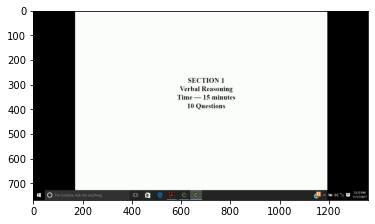

In [5]:
img = plt.imread('frame0.jpg')   # reading image
plt.imshow(img)
print(count)

In [9]:
img1 = Image.open("frame2.jpg")
img2 = Image.open("frame3.jpg")

# finding difference
diff = ImageChops.difference(img1, img2)
# showing the difference
diff.show()
diff.save("BLACK.jpg")

blackImage = cv2.imread("BLACK.jpg", 0)

pixel = cv2.imread("BLACK.jpg", cv2.IMREAD_GRAYSCALE)
n_white_pix = np.sum(pixel == 255)
print('Number of white pixels:', n_white_pix)

if n_white_pix == 0:
    print("Image IS the same")
else:
    print("Image IS NOT the same")

Number of white pixels: 1703
Image IS NOT the same


In [6]:
Flag = []

for i in range(count - 1):
    j = i + 1
    if j > count - 1:
        break
    imgOne = Image.open("frame%d.jpg" % i)
    imgTwo = Image.open("frame%d.jpg" % j)
    # finding difference
    diff = ImageChops.difference(imgOne, imgTwo)
    # saving the difference image
    diff.save("BLACK.jpg")
    # checking if the image is full black. Full black == SAME IMAGE == No questions changed
    blackImage = cv2.imread("BLACK.jpg", 0)
    
    pixel = cv2.imread("BLACK.jpg", cv2.IMREAD_GRAYSCALE)
    n_white_pix = np.sum(pixel == 255)

    if n_white_pix == 0:
        continue
    else:
        Flag.append(i)
        
print(Flag)

[2, 13, 24, 32, 42, 58, 81, 89, 114, 127, 132, 154, 169, 184, 187, 212, 249, 258, 288, 301, 310, 336, 370, 416]
